### source:
https://scikit-learn.org/stable/auto_examples/linear_model/plot_lasso_and_elasticnet.html#sphx-glr-auto-examples-linear-model-plot-lasso-and-elasticnet-py

### extended by: 
[morkapronczay](https://github.com/morkapronczay)

In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet

## CREATE DATA

In [33]:
# Generate some sparse data to play with
np.random.seed(42)

n_samples, n_features = 50, 20
X = np.random.randn(n_samples, n_features)

# Decreasing coef w. alternated signs for visualization
idx = np.arange(n_features)
coef = (-1) ** idx * np.exp(-idx / 10)
coef[10:] = 0  # sparsify coef
y = np.dot(X, coef)

# Add noise - play around with this at home!
y += 0.1 * np.random.normal(size=n_samples)

# Split data in train set and test set
n_samples = X.shape[0]
X_train, y_train = X[:n_samples // 2], y[:n_samples // 2]
X_test, y_test = X[n_samples // 2:], y[n_samples // 2:]

In [34]:
# regularization parameter
alpha = 0.1

## FIT SIMPLE OLS

In [35]:
# linreg
linreg = LinearRegression()

y_pred_linreg = linreg.fit(X_train, y_train).predict(X_test)
r2_score_linreg = r2_score(y_test, y_pred_linreg)

print("r^2 on test data : %f" % r2_score_linreg)

r^2 on test data : 0.986050


In [36]:
r2_score(y_train, linreg.predict(X_train))

0.999739160140479

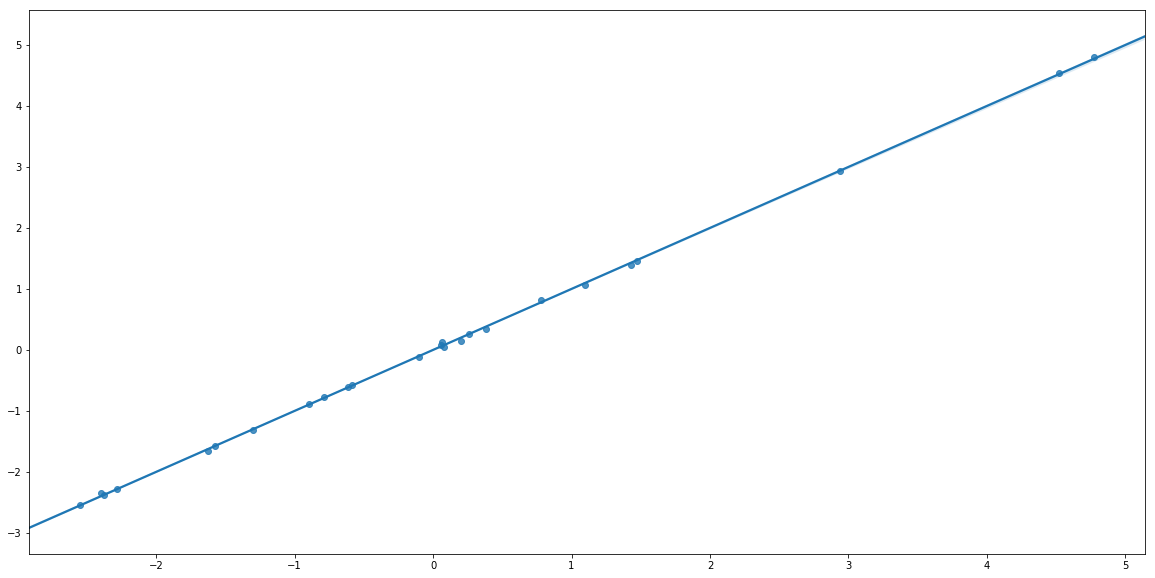

In [37]:
fig, ax = plt.subplots(figsize=(20,10))
sns.regplot(y_train, linreg.predict(X_train))

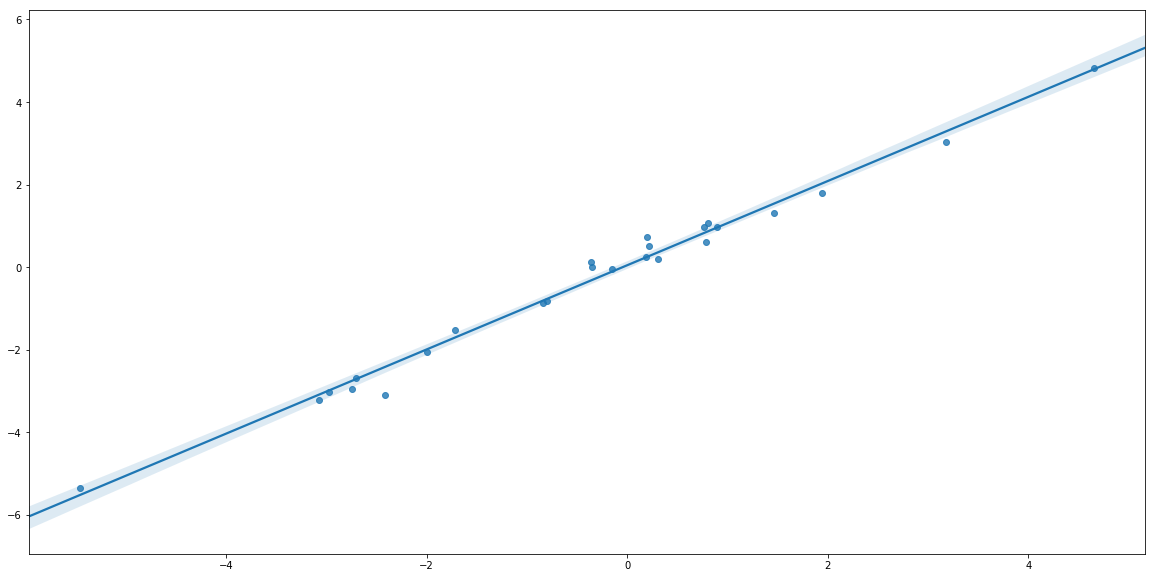

In [38]:
fig, ax = plt.subplots(figsize=(20,10))
sns.regplot(y_test, y_pred_linreg)

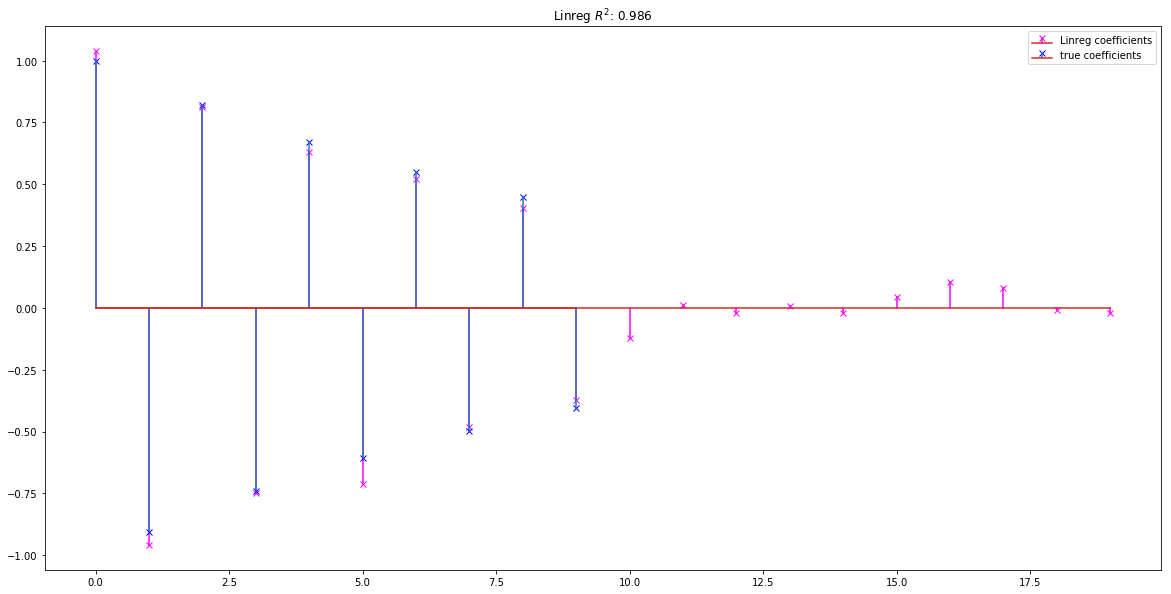

In [39]:
# Plot coefficients
m, s, _ = plt.stem(np.where(linreg.coef_)[0], linreg.coef_[linreg.coef_ != 0],
                   markerfmt='x', label='Linreg coefficients')
plt.setp([m, s], color="#FF00FF")
plt.stem(np.where(coef)[0], coef[coef != 0], label='true coefficients',
         markerfmt='bx')

plt.legend(loc='best')
plt.title("Linreg $R^2$: %.3f"
          % r2_score_linreg)
fig = plt.gcf()
fig.set_size_inches(20,10)

plt.show()

In [40]:
# squared & absolute sum of coefficients
print(f'Squared sum of linreg coefficients: {(linreg.coef_ ** 2) .sum()}')
print(f'Absolute sum of linreg coefficients: {abs(linreg.coef_).sum()}')

Squared sum of linreg coefficients: 4.960146645939703
Absolute sum of linreg coefficients: 7.1181041698853695


## RIDGE

In [41]:
# Ridge
ridge = Ridge(alpha=alpha)

y_pred_ridge = ridge.fit(X_train, y_train).predict(X_test)
r2_score_ridge = r2_score(y_test, y_pred_ridge)

print("r^2 on test data : %f" % r2_score_ridge)

r^2 on test data : 0.986089


In [42]:
r2_score(y_train, ridge.predict(X_train))

0.9996643324432288

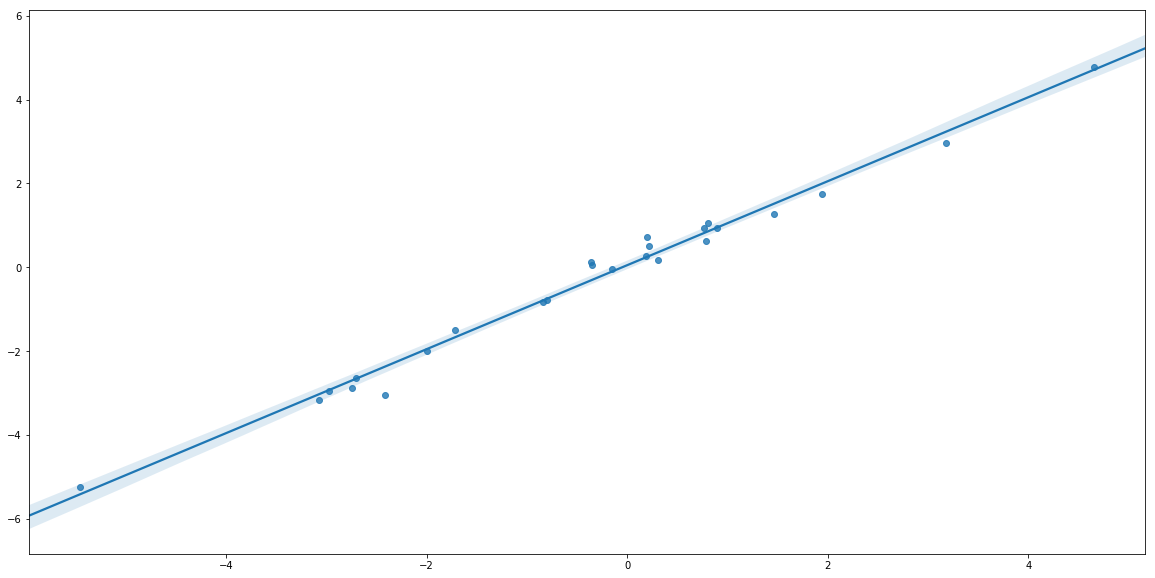

In [43]:
fig, ax = plt.subplots(figsize=(20,10))
sns.regplot(y_test, y_pred_ridge)

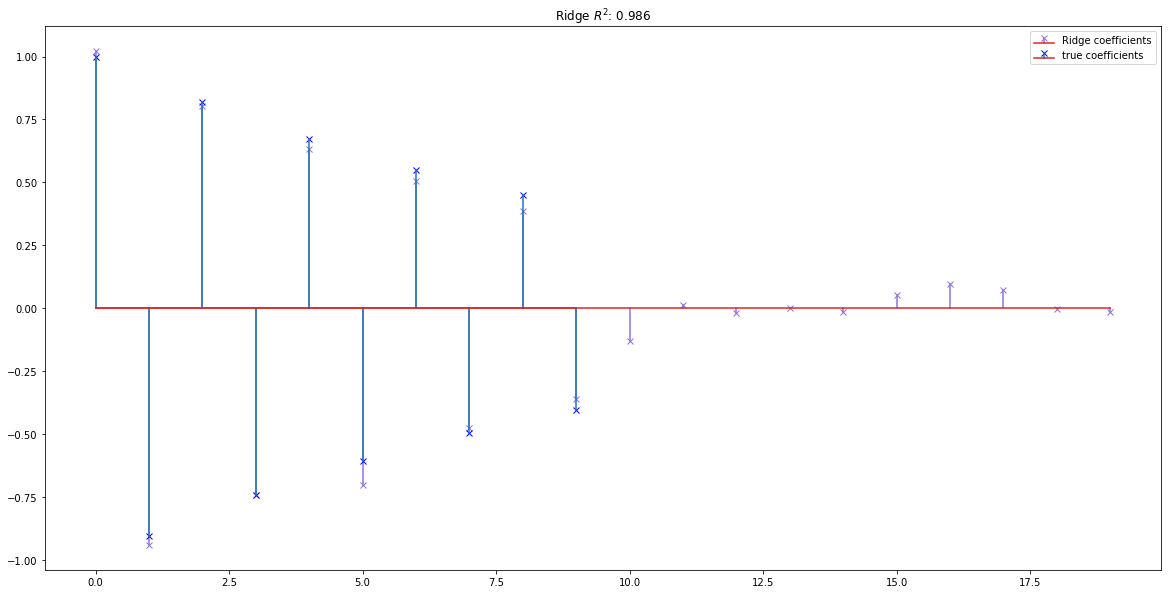

In [44]:
# Plot coefficients
m, s, _ = plt.stem(np.where(ridge.coef_)[0], ridge.coef_[ridge.coef_ != 0],
                   markerfmt='x', label='Ridge coefficients')
plt.setp([m, s], color='#9370DB')
plt.stem(np.where(coef)[0], coef[coef != 0], label='true coefficients',
         markerfmt='bx')

plt.legend(loc='best')
plt.title("Ridge $R^2$: %.3f"
          % r2_score_ridge)
fig = plt.gcf()
fig.set_size_inches(20,10)
plt.show()

In [45]:
# squared & absolute sum of coefficients
print(f'Squared sum of ridge coefficients: {(ridge.coef_ ** 2) .sum()}')
print(f'Absolute sum of ridge coefficients: {abs(ridge.coef_).sum()}')

Squared sum of ridge coefficients: 4.823296163710031
Absolute sum of ridge coefficients: 6.994455886690192


## LASSO

In [46]:
# Lasso
lasso = Lasso(alpha=alpha)

y_pred_lasso = lasso.fit(X_train, y_train).predict(X_test)
r2_score_lasso = r2_score(y_test, y_pred_lasso)

print("r^2 on test data : %f" % r2_score_lasso)

r^2 on test data : 0.762798


In [47]:
r2_score(y_train,lasso.predict(X_train))

0.9424235136879368

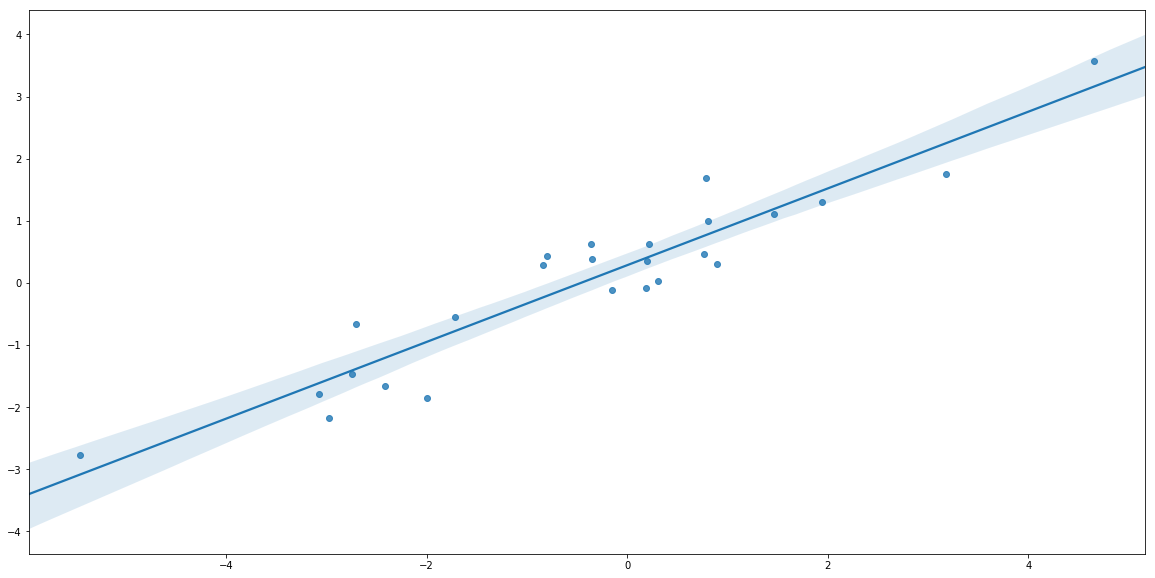

In [48]:
fig, ax = plt.subplots(figsize=(20,10))
sns.regplot(y_test, y_pred_lasso, ax=ax)

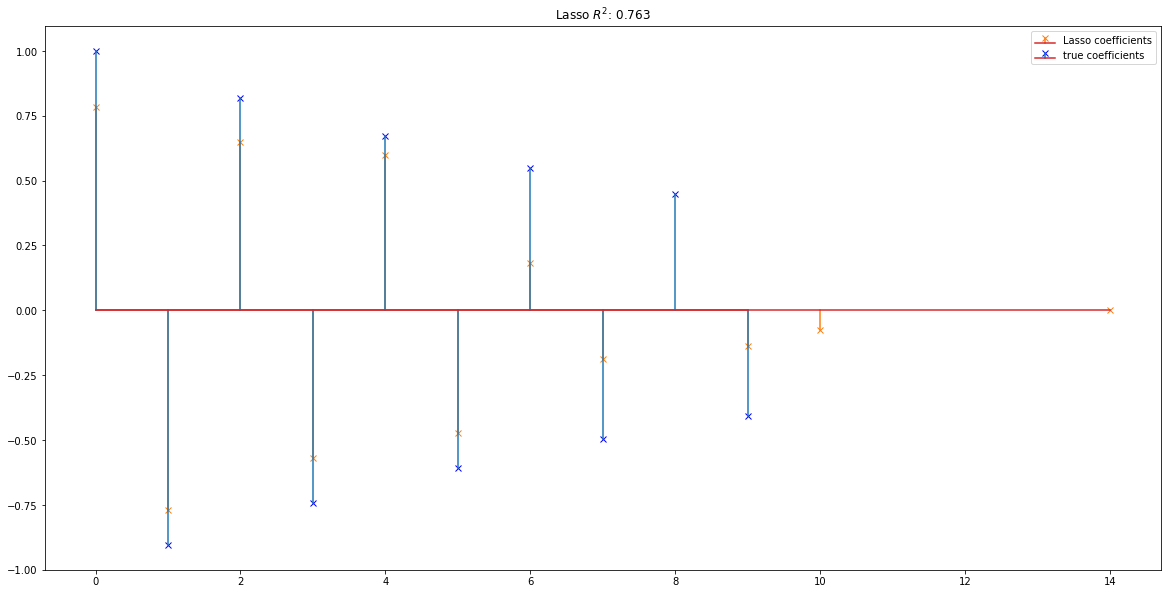

In [49]:
m, s, _ = plt.stem(np.where(lasso.coef_)[0], lasso.coef_[lasso.coef_ != 0],
                   markerfmt='x', label='Lasso coefficients')
plt.setp([m, s], color='#ff7f0e')
plt.stem(np.where(coef)[0], coef[coef != 0], label='true coefficients',
         markerfmt='bx')

plt.legend(loc='best')
plt.title("Lasso $R^2$: %.3f"
          % r2_score_lasso)
fig = plt.gcf()
fig.set_size_inches(20,10)
plt.show()

In [15]:
# squared & absolute sum of coefficients
print(f'Squared sum of lasso coefficients: {(lasso.coef_ ** 2) .sum()}')
print(f'Absolute sum of lasso coefficients: {abs(lasso.coef_).sum()}')

Squared sum of lasso coefficients: 2.373528559094712
Absolute sum of lasso coefficients: 5.328718259301843


## ELASTIC NET

In [16]:
# ElasticNet
enet = ElasticNet(alpha=alpha, l1_ratio=0.9) # play around with l1_ratio at home to get ridge or lasso results back

y_pred_enet = enet.fit(X_train, y_train).predict(X_test)
r2_score_enet = r2_score(y_test, y_pred_enet)

print("r^2 on test data : %f" % r2_score_enet)

r^2 on test data : 0.649441


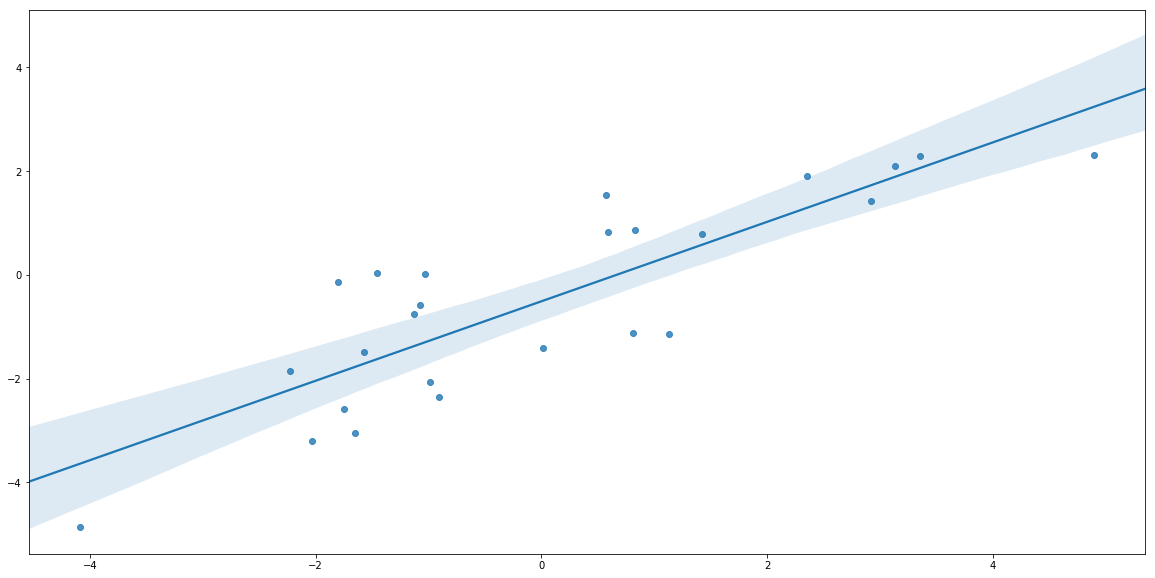

In [17]:
fig, ax = plt.subplots(figsize=(20,10))
sns.regplot(y_test, y_pred_enet, ax=ax)

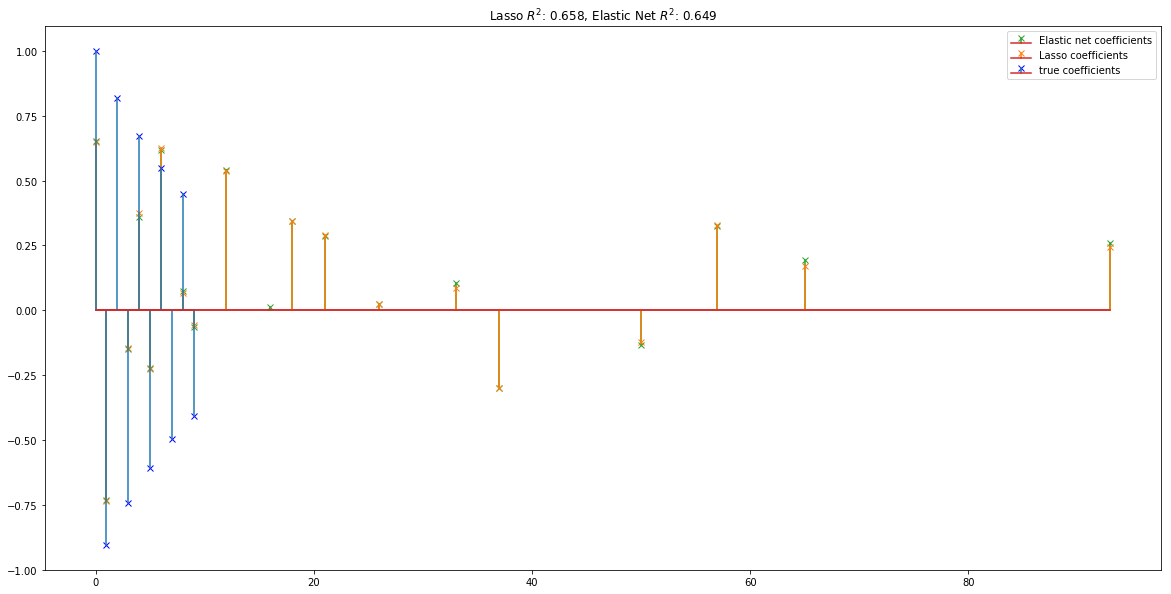

In [18]:
m, s, _ = plt.stem(np.where(enet.coef_)[0], enet.coef_[enet.coef_ != 0],
                   markerfmt='x', label='Elastic net coefficients')
plt.setp([m, s], color="#2ca02c")

m, s, _ = plt.stem(np.where(lasso.coef_)[0], lasso.coef_[lasso.coef_ != 0],
                   markerfmt='x', label='Lasso coefficients')
plt.setp([m, s], color='#ff7f0e')
plt.stem(np.where(coef)[0], coef[coef != 0], label='true coefficients',
         markerfmt='bx')

plt.legend(loc='best')
plt.title("Lasso $R^2$: %.3f, Elastic Net $R^2$: %.3f"
          % (r2_score_lasso, r2_score_enet))
fig = plt.gcf()
fig.set_size_inches(20,10)
plt.show()

In [19]:
# squared & absolute sum of coefficients
print(f'Squared sum of elasticnet coefficients: {(enet.coef_ ** 2) .sum()}')
print(f'Absolute sum of elasticnet coefficients: {abs(enet.coef_).sum()}')

Squared sum of elasticnet coefficients: 2.378679453916953
Absolute sum of elasticnet coefficients: 5.402854756735889


a great concise explanation

https://stats.stackexchange.com/questions/151954/sparsity-in-lasso-and-advantage-over-ridge-statistical-learning

a technical, very precise explanation

https://www.youtube.com/watch?v=sO4ZirJh9ds

this guy is great

https://www.youtube.com/user/atihler